### Import Required Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as  sns
from mpl_toolkits.basemap import Basemap

### Data Description

In [3]:
df1=pd.read_csv("iraste_nxt_cas.csv")
df2=pd.read_csv("iraste_nxt_casdms.csv")

print("shape of first dataset",df1.shape)
print(df1.describe())

print("shape of second dataset",df2.shape)
print(df2.describe())

shape of first dataset (1785509, 7)
                Lat          Long       Vehicle         Speed
count  1.785508e+06  1.785508e+06  1.785509e+06  1.785509e+06
mean   1.760528e+01  7.899734e+01  5.536336e+03  5.943645e+01
std    2.125467e+00  1.005071e+00  2.866079e+03  2.063253e+01
min    1.221056e+01  7.390717e+01  1.140000e+02  0.000000e+00
25%    1.662601e+01  7.832018e+01  3.185000e+03  5.000000e+01
50%    1.718232e+01  7.906153e+01  6.132000e+03  6.400000e+01
75%    1.833605e+01  7.953207e+01  8.113000e+03  7.400000e+01
max    2.213794e+01  8.333997e+01  9.887000e+03  1.000000e+02
shape of second dataset (60487, 7)
                Lat          Long       Vehicle         Speed
count  60487.000000  60487.000000  60487.000000  60487.000000
mean      17.068180     79.572953   7168.667978     66.157852
std        0.235367      0.607719   1305.320076     14.917828
min       16.492685     78.234730   3867.000000      0.000000
25%       16.916235     79.103022   6123.000000     59.000000

### Data Cleanup

In [4]:
print("the null data for data 1\n",df1.isnull().sum(),"\n")
print("the null data for data 2\n",df2.isnull().sum(),"\n")

print(df1.drop_duplicates())
print(df2.drop_duplicates())

# we can see that there is no errors in 2nd dataset where DMS is used
print(df1.dropna(inplace=True),df2.dropna(inplace=True))  
print(df1.describe())
print("\n\n",df2.describe(),"\n")

# it will print :"none" as we can used inplace as "True" which means it will permanently remove the rows will null value  from the data
# we have successfully removed all the null values

the null data for data 1
 Alert      0
Date       0
Time       0
Lat        1
Long       1
Vehicle    0
Speed      0
dtype: int64 

the null data for data 2
 Alert      0
Date       0
Time       0
Lat        0
Long       0
Vehicle    0
Speed      0
dtype: int64 

           Alert        Date      Time        Lat       Long  Vehicle  Speed
0        cas_ldw  2022-05-01  00:00:06  14.196872  77.631213   3829.0     58
1        cas_ldw  2022-05-01  00:00:07  16.511887  80.746034   8111.0     56
2        cas_ldw  2022-05-01  00:00:11  17.908537  78.464064   1153.0     74
3        cas_ldw  2022-05-01  00:00:11  13.152203  77.620431   7103.0     72
4        cas_ldw  2022-05-01  00:00:15  16.512134  80.748452   8111.0     57
...          ...         ...       ...        ...        ...      ...    ...
1785504  cas_ldw  2022-05-30  23:51:58  21.137266  79.341276   1750.0     59
1785505  cas_ldw  2022-05-30  23:52:22  21.137074  79.336862   1750.0     63
1785506  cas_ldw  2022-05-30  23:52:34  21.

### Data Visualization

#### Data Description

In [5]:
x1=df1[["Time","Long","Lat","Speed"]]
y1=df1["Alert"]
x2=df2[["Time","Long","Lat","Speed"]]
y2=df2["Alert"]
print(x1.head(),"\n\n",y1.head(),"\n")
print(x2.head(),"\n",y2.head(),"\n")

       Time       Long        Lat  Speed
0  00:00:06  77.631213  14.196872     58
1  00:00:07  80.746034  16.511887     56
2  00:00:11  78.464064  17.908537     74
3  00:00:11  77.620431  13.152203     72
4  00:00:15  80.748452  16.512134     57 

 0    cas_ldw
1    cas_ldw
2    cas_ldw
3    cas_ldw
4    cas_ldw
Name: Alert, dtype: object 

       Time       Long        Lat  Speed
0  00:00:29  79.306623  17.158688     55
1  00:00:52  79.309335  17.158928     60
2  00:01:03  79.310747  17.159078     67
3  00:01:16  79.314245  17.159457     73
4  00:01:27  80.246173  16.814285     61 
 0    cas_hmw
1    cas_ldw
2    cas_ldw
3    cas_ldw
4    cas_ldw
Name: Alert, dtype: object 



In [6]:
print(y1.value_counts())
print(y2.value_counts())

Alert
cas_ldw       1247249
cas_hmw        354839
cas_pcw        119056
hard_brake      32464
cas_fcw         31900
Name: count, dtype: int64
Alert
cas_ldw           51943
cas_hmw            7025
cas_pcw             469
cas_fcw             339
dms_distracted      328
hard_brake          258
dms_noseatbelt       71
dms_asleep           43
dms_onphone           6
dms_smoking           4
dms_drowsy            1
Name: count, dtype: int64


### Histogram for frequency of alerts

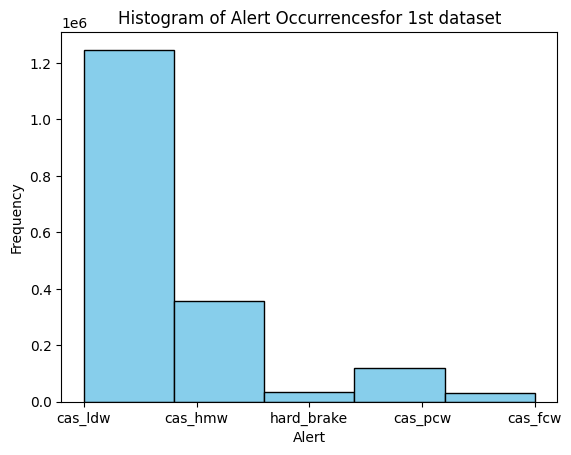

In [7]:

plt.hist(df1['Alert'], bins=len(df1['Alert'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Alert')
plt.ylabel('Frequency')
plt.title('Histogram of Alert Occurrencesfor 1st dataset')
plt.show()

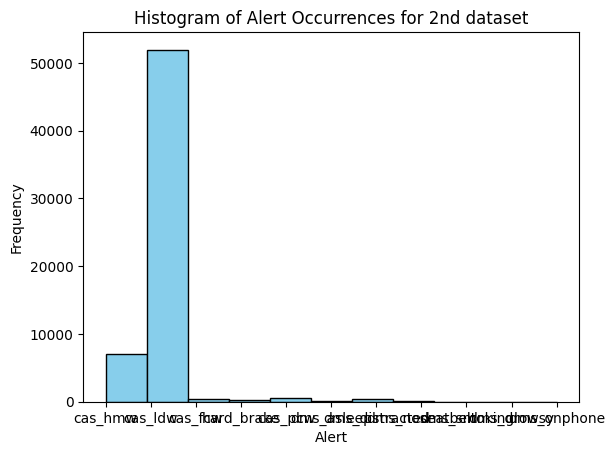

In [8]:
plt.hist(df2['Alert'], bins=len(df2['Alert'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Alert')
plt.ylabel('Frequency')
plt.title('Histogram of Alert Occurrences for 2nd dataset')
plt.show()

### Pair plot

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

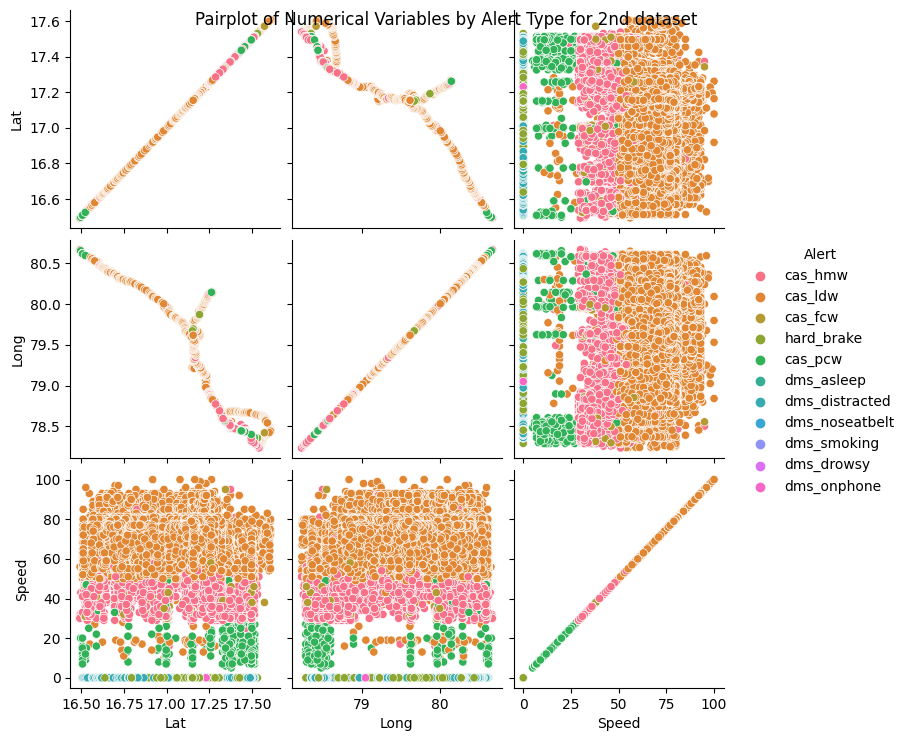

In [10]:
# Pairplot between lat, long, speed for dataset2
sns.pairplot(df2.drop(columns=['Date', 'Time', 'Vehicle']), hue='Alert', diag_kind=None)
plt.suptitle('Pairplot of Numerical Variables by Alert Type for 2nd dataset ')
plt.show()

### Time vs alerts 

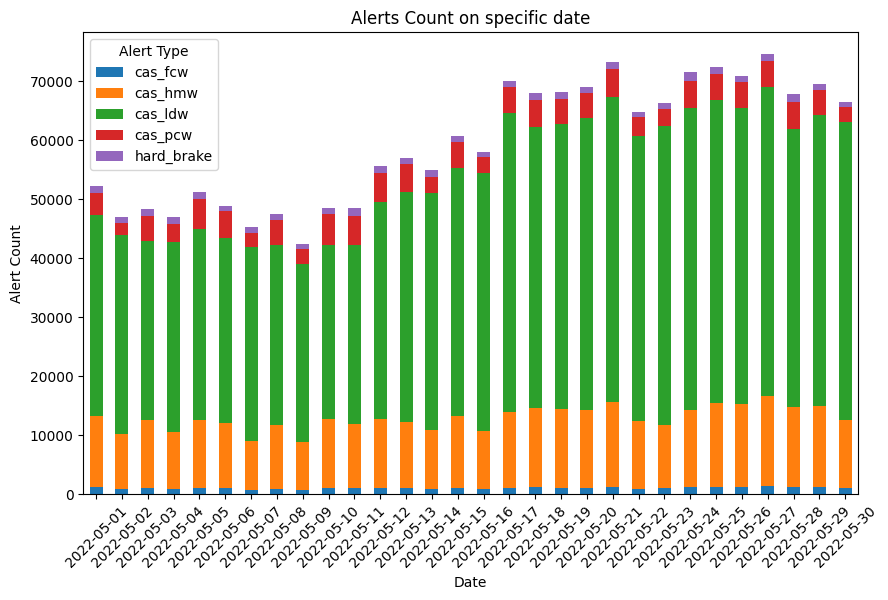

In [11]:
agg_df2 = df1.groupby('Date')['Alert'].value_counts().unstack(fill_value=0)

# Plot aggregated alerts for each date
agg_df2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Alert Count')
plt.title('Alerts Count on specific date')
plt.legend(title='Alert Type')
plt.xticks(rotation=45)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_5880\1049982129.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['hour'] = pd.to_datetime(df2['Time']).dt.hour


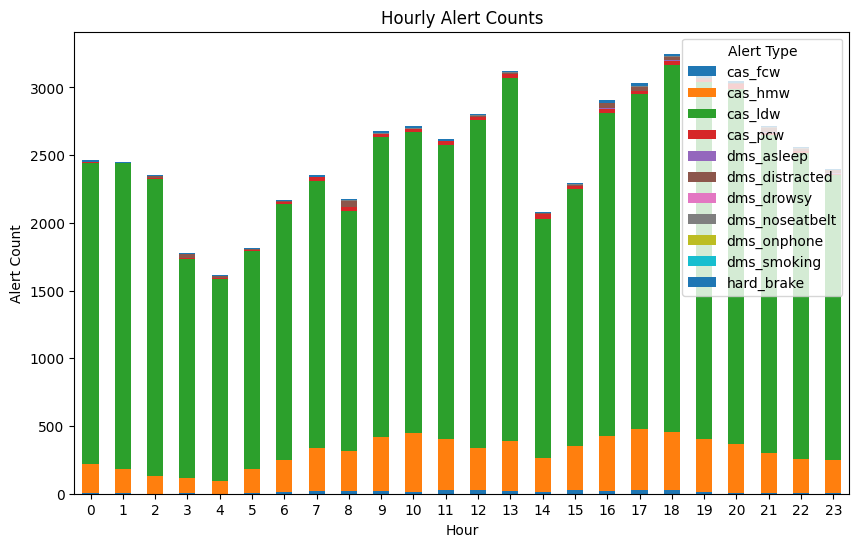

In [12]:
df2['hour'] = pd.to_datetime(df2['Time']).dt.hour

# Group the data by hour and alert, and count the occurrences in dataset2
hourly_alert_counts = df2.groupby(['hour', 'Alert']).size().unstack(fill_value=0)

# Plot the hourly alert counts
hourly_alert_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Hour')
plt.ylabel('Alert Count')
plt.title('Hourly Alert Counts')
plt.legend(title='Alert Type', loc='upper right')
plt.xticks(rotation=0)
plt.show()

### Vehicle vs alerts

In [13]:
print(df2[["Vehicle","Alert"]].value_counts().sort_index())

Vehicle  Alert         
3867     cas_fcw              20
         cas_hmw             358
         cas_ldw            1733
         cas_pcw              13
         hard_brake            9
6123     cas_fcw             157
         cas_hmw            2728
         cas_ldw           21128
         cas_pcw             229
         hard_brake           59
6837     cas_fcw              29
         cas_hmw            1127
         cas_ldw            7263
         cas_pcw              53
         hard_brake           41
8122     cas_fcw              84
         cas_hmw            1062
         cas_ldw            9790
         cas_pcw              75
         hard_brake           54
8877     cas_fcw              49
         cas_hmw            1750
         cas_ldw           12029
         cas_pcw              99
         dms_asleep           43
         dms_distracted      328
         dms_drowsy            1
         dms_noseatbelt       71
         dms_onphone           6
         dms_smokin

In [14]:

dms_df = df2[df2['Alert'].str.startswith('d')]

dms_count_per_vehicle = dms_df.groupby('Vehicle')['Alert'].count()

# the count of 'dms' alerts for each vehicle
print(dms_count_per_vehicle)


Vehicle
8877    453
Name: Alert, dtype: int64


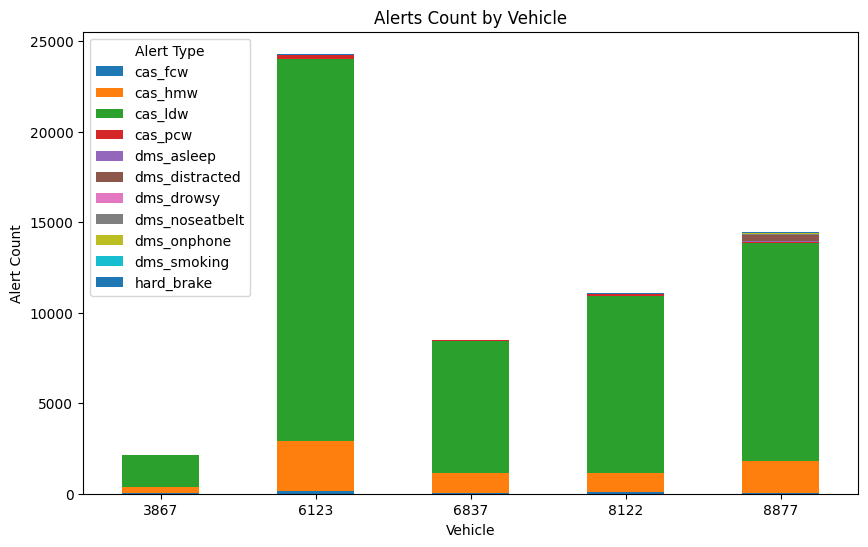

In [15]:
agg_df = df2.groupby('Vehicle')['Alert'].value_counts().unstack(fill_value=0)

# Plot aggregated alerts for each vehicle
agg_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Vehicle')
plt.ylabel('Alert Count')
plt.title('Alerts Count by Vehicle')
plt.legend(title='Alert Type')
plt.xticks(rotation=0)
plt.show()

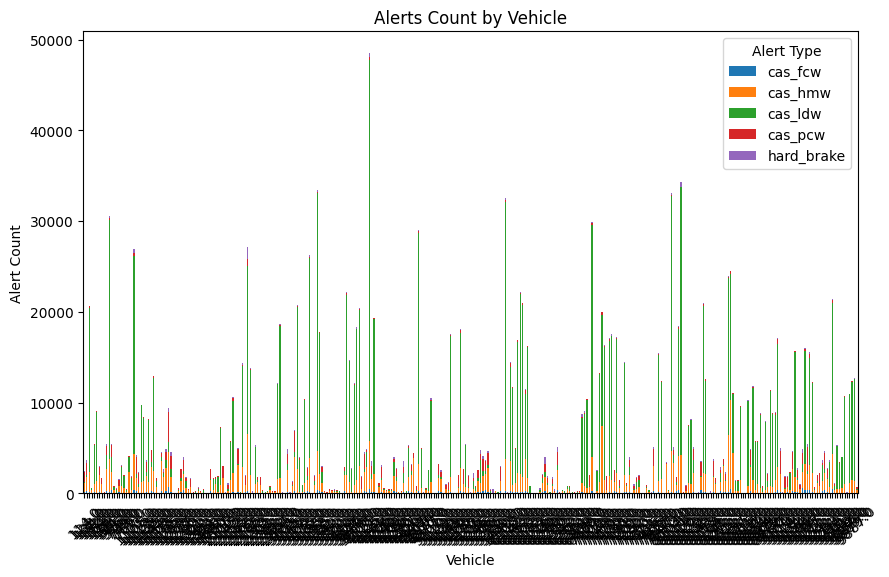

In [16]:
agg_df1 = df1.groupby('Vehicle')['Alert'].value_counts().unstack(fill_value=0)

# Plot aggregated alerts for each vehicle in dataset1
# there are more than 300 vehicles in dataset1 
agg_df1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Vehicle')
plt.ylabel('Alert Count')
plt.title('Alerts Count by Vehicle')
plt.legend(title='Alert Type')
plt.xticks(rotation=45)
plt.show()


### vehicle history

In [17]:
# demonstrating the history of vehicle and their alerts with time
print(df2[["Vehicle","Alert","hour"]].value_counts().sort_index())

Vehicle  Alert       hour
3867     cas_fcw     0       1
                     1       1
                     6       1
                     7       1
                     8       2
                            ..
8877     hard_brake  19      4
                     20      3
                     21      4
                     22      4
                     23      5
Name: count, Length: 562, dtype: int64


#---------------------------- data 1 plots --------------------


In [18]:
print(df1[["Vehicle","Alert"]].value_counts().sort_index())

Vehicle  Alert     
114.0    cas_fcw        105
         cas_hmw       1057
         cas_ldw         60
         cas_pcw       1123
         hard_brake     109
                       ... 
9887.0   cas_fcw         37
         cas_hmw        293
         cas_ldw        142
         cas_pcw        214
         hard_brake      54
Name: count, Length: 1414, dtype: int64


In [19]:

# sns.pairplot(df1.drop(columns=['Date', 'Time', 'Vehicle']), hue='Alert', diag_kind=None)
# plt.suptitle('Pairplot of Numerical Variables by Alert Type for 1st dataset ')
# plt.show()